## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [1]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [2]:
# Example 1

In [3]:
# Example 2: 

In [4]:
# Example 3: 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

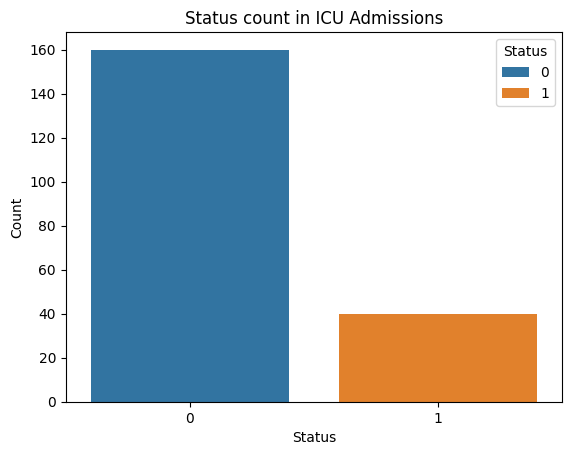

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Status', hue = 'Status', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status count in ICU Admissions')
plt.show()

In [6]:
status_counts = df

##### What to write about a bar plot

- What is this plot about? (what feature?)
- Percentage/Count for each group
- Whether there is a clear difference in the percentage/count


Among 200 patients, 160 (80%) survived while 40 (20%) died, showing that in the ICU, patients are more likely to survive than not.

#### One continous: histogram/density plot/boxplot

##### Difference between histogram and bar plot

- Histograms are used to illustrate continuous data, while bar plots are used to illustrate categorical data. (No spaces between bars on a histogram!)
- You cannot rearrange the order of the bars on a histogram, while bar plots can be rearranged by category.
- Very rare to find a histogram in a horizontal format, while bar plots are commonly found in both vertical and horizontal formats.


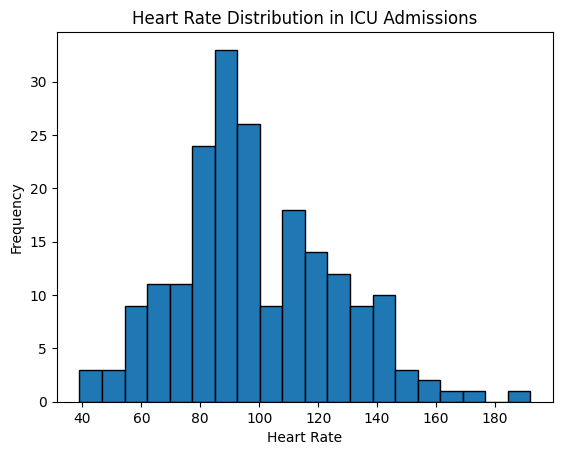

In [7]:
plt.hist(df['HeartRate'], bins = 20, edgecolor = 'black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

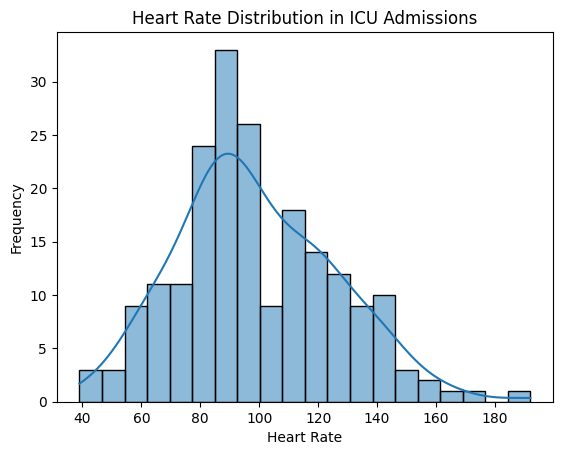

In [8]:
sns.histplot(df['HeartRate'], kde = True, bins =20)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

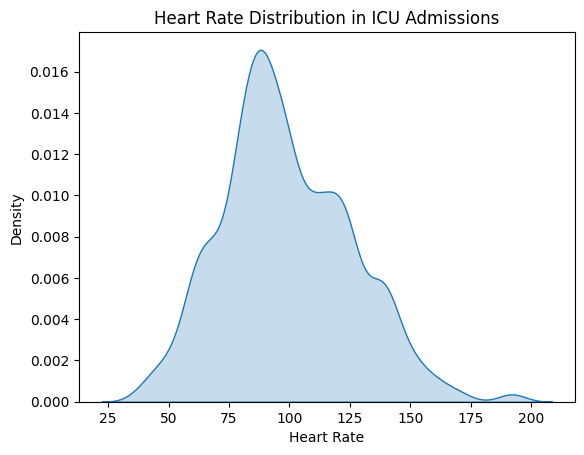

In [9]:
sns.kdeplot(df['HeartRate'], bw_adjust = .6, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

This is a distribution of heart rate in ICU Admissions. This distribution has a unimodal distribution and is slightly skewed to the right, indicating the presense of potential outliers in the dataset with high(er) heart rates than the average patient in the dataset. A typical value in this dataset is within the range of 98.9 $\pm$ 26.8

##### What to write about a histogram/density plot

- What is the plot about?
- Shape (skew and mode)
- Majorities of the data (typical value = mean $\pm$ standard deviation) *more often in medical analytics
- Potential outliers
<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

##### Difference between histogram/density plot/ boxplot

- Histograms and density plots emphasize and illustrate the distribution of the data. 
- The Boxplot has an emphasis on the basic statistics of the data (median, IQR). 
- The Boxplot assumes the data follows a normal distribution. Cannot accomodate data sets with two peaks, or two lows.
- A Boxplot does not require paramaters, while histograms and density plots require input paramaters to determine the sensitivity of the illustration
- With multiple groups, it is easier to compare boxplots and density plots in a side-by-side visualization

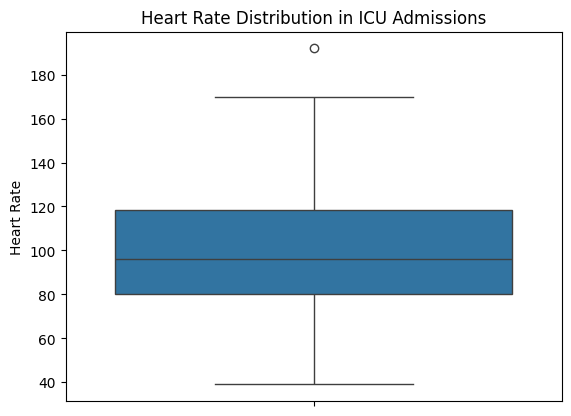

In [10]:
sns.boxplot(y = 'HeartRate', data=df)
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

This is a distribution of heart rate in ICU Admissions. This distribution is slightly skewed to the right, indicating the presense of outliers in the dataset with considerably high(er) heart rates than the average patient in the dataset. A typical value in this dataset is within the range of 98.9 $\pm$ 26.8

##### What to write about a box plot

- What is the plot about?
- Can comment on skewness, but not mode
- Majority of the data (IQR)
- Potential outliers

#### Two continous: scatter plot

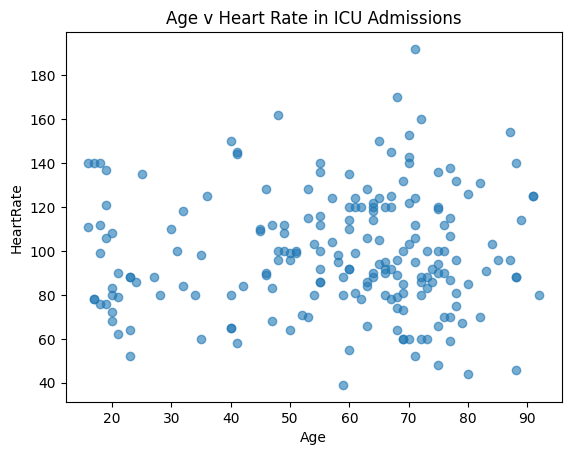

In [11]:
plt.scatter(df['Age'], df['HeartRate'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('HeartRate')
plt.title("Age v Heart Rate in ICU Admissions")
plt.show()

This is a distribution showing the relationship between age and heart rate for each patient in the dataset. There is no clear indication of a trend, linear or non-linear. There are also no clear outliers.

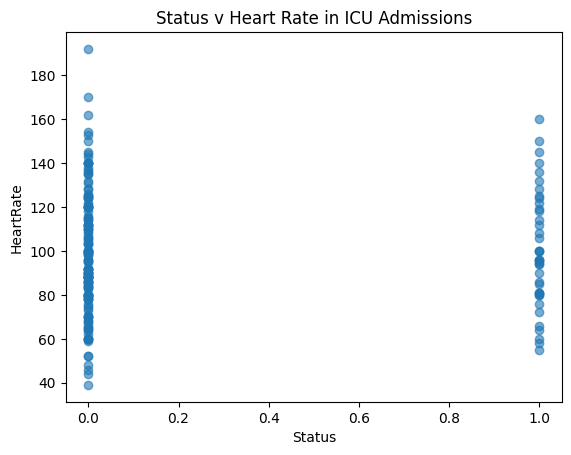

In [12]:
plt.scatter(df['Status'], df['HeartRate'], alpha=0.6)
plt.xlabel('Status')
plt.ylabel('HeartRate')
plt.title("Status v Heart Rate in ICU Admissions")
plt.show()

##### What to write about a scatter plot

- What is the plot about?
- What is the trend of the data? (linear/non-linear)
- Strong/weak relationship?
- Outliers/clusters?


#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

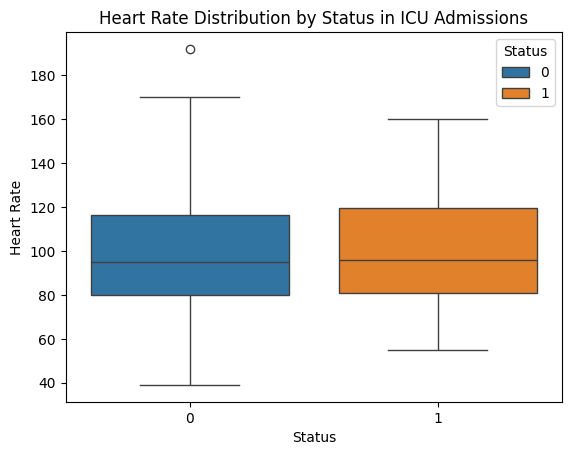

In [13]:
sns.boxplot(x = 'Status', y = 'HeartRate', hue = 'Status', data=df)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title("Heart Rate Distribution by Status in ICU Admissions")
plt.show()

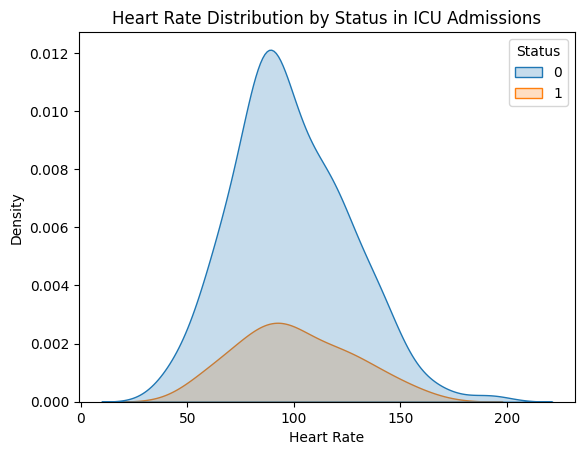

In [14]:
sns.kdeplot(x = 'HeartRate', hue = 'Status', data=df, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title("Heart Rate Distribution by Status in ICU Admissions")
plt.show()

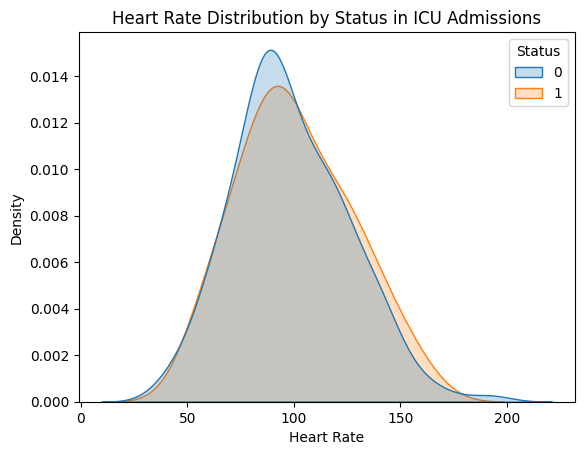

In [15]:
sns.kdeplot(x = 'HeartRate', hue = 'Status', data=df, common_norm = False, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title("Heart Rate Distribution by Status in ICU Admissions")
plt.show()

This figure is a side-by-side boxplot illustrating the relationship between heart rate and ICU status. The box plots overlap, indicating there may be no significant differences between heart rate distributions of the two groups

##### What to write about a side-by-side boxplot or density plot

- What is the plot about?
- Highlight comparisons.
- Reflect on the extent to which the plots overlap.


#### Two categorical: side-by-side bar plot

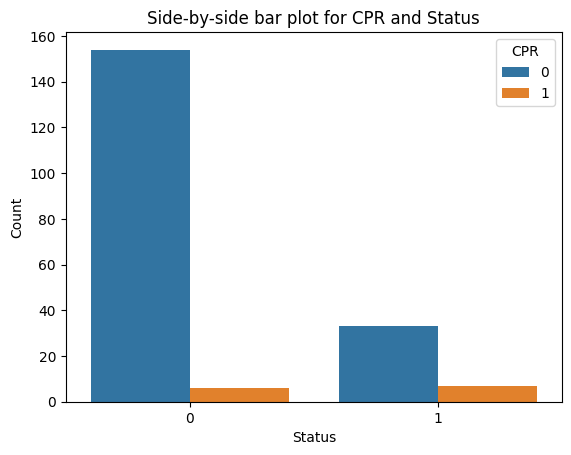

In [16]:
df['CPR'] = df['CPR'].astype('str')

sns.countplot(x = 'Status', hue = 'CPR', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for CPR and Status')
plt.show()

In [17]:
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'all')
proportion_table

CPR,0,1
Status,,
0,0.770,0.030
1,0.165,0.035


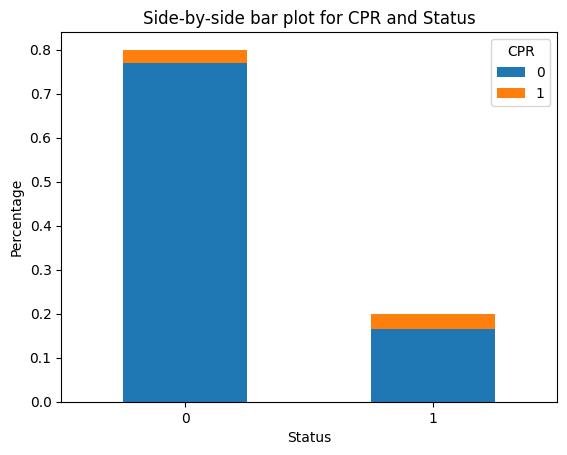

In [18]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel('Status')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Percentage')
plt.title('Side-by-side bar plot for CPR and Status')
plt.show()

##### What to write about a side-by-side bar plot

- What the plot is about
- Highlighted comparisons

The figure above is a stacked bar plot illustrating the relationship between life status and use of CPR. The color indicates whether the patient received CPR. The figure indicates the distribution of CPR use is different in the survival and non-survival groups. There is a lower proportion of surviving patients that received CPR, than there is of dead patients who received CPR. This could support a hypothesis that CPR is used as a last resort, in more dire situations.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [19]:
#titanic_data = sns.load_dataset('titanic')
#print(titanic_data.head())

In [20]:
tdf = pd.read_csv("titanic.csv")
print(tdf.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [21]:
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


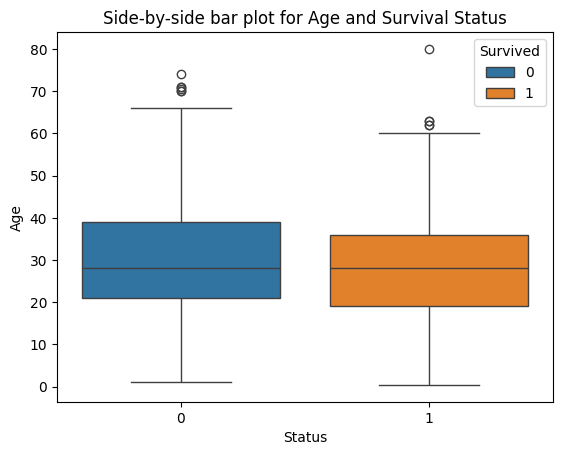

In [22]:
sns.boxplot(x = 'Survived', y = 'Age', hue = 'Survived', data=tdf)
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Side-by-side bar plot for Age and Survival Status')
plt.show()

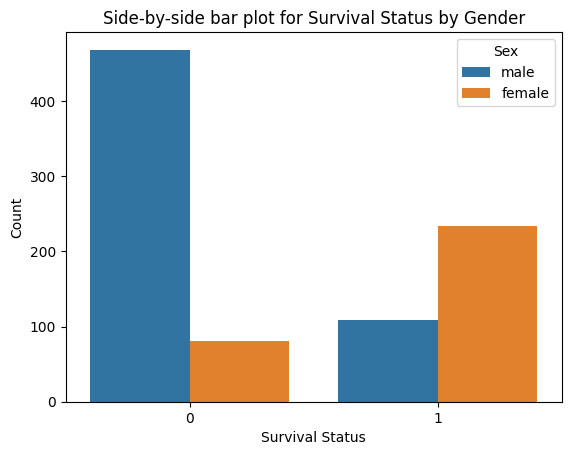

In [31]:
# Sex vs. Survival
sns.countplot(x = 'Survived', hue = 'Sex', data = tdf)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for Survival Status by Gender')
plt.show()

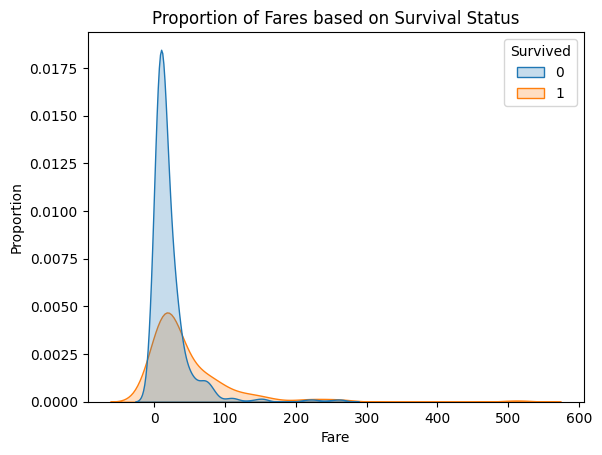

In [78]:
sns.kdeplot(x = 'Fare', hue = 'Survived', data=tdf, fill = True)
plt.xlabel('Fare')
plt.ylabel('Proportion')
plt.title("Proportion of Fares based on Survival Status")
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?